In [817]:
# Import Packages 
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization essentials  
import seaborn as sns # enhanced data visualization essentials 

# Specifying a file 
file = './Final_Project_Dataset.xlsx'

# Reading the file into python through pandas
world = pd.read_excel (io = file,
                         sheet_name = 'Data',
                         header = 0)
    


In [818]:
# Checking the first 5 rows  of the data 
world.head(n = 5)

#Obtaining the number of unique countries and regions
r_count = world['Hult Region'].nunique()
c_count = world['Country Name'].nunique()

#Printing the obtained infromation
print(f'''Provided dataframe contain {c_count} countries across {r_count} regions.''')


#Slicing the dataframe for the assigned region based on the Cool Name Column 
ironhide = world[world['Cool Name'] == 'Ironhide']

#Reseting the index in our new data frame 
ironhide = ironhide.reset_index(drop = True)


# Checking the first 5 rows  of the data 
ironhide.head(n = 5)

#Obtaining the number of unique countries in assigned region 
c_count_r = ironhide['Country Name'].nunique()
name_of_the_region  = ironhide['Hult Region'][1]
print(f'''Assigned region, {name_of_the_region}, consist of {c_count_r} countries.''')


Provided dataframe contain 217 countries across 14 regions.
Assigned region, South America, consist of 13 countries.


South America is located in the western hemisphere of the world and has a total of 14 countries in it. There are fourteen countries in total in South America. The majority of South American Countries speak Spanish as their first language except for Brazil who speaks Portuguese as their main dialect. A continent embraced with culture Sport is one of the biggest cultures in South America with Football being the most popular and the most played sport. Brazil which in fact is the most populous country in South America has won the most FIFA world cups with 6 titles. Another big part of the culture in South America is their contemporary forms of dance such as Samba and Tango which were founded by Brazil and Argentina and are well known around the world. Due to the continent being so close to the equatorial zone South America has relatively high temperatures and mild winters, which makes it a target zone for tourists coming from other continents that have colder temperatures as there are some famous beaches such as Copacabana in Brazil. South America is also home to some of the most famous landmarks in the world. The Amazon Rainforest, Macchu Pichu and the Iguaz Falls just to name a few. Every year Millions of tourist visit these landmarks in South America which provides the locals with a lot of employment and a massive boost to the economy, this was all before the pandemic crisis of 2020. 

In order to understand which country best represent the region on average, region data frame should be tested for missing values.

In [3]:
#Obtaining number of features in total existed in the DataFrame
length_of_features = len(ironhide.columns)
print(f'Overall the data set consists of {length_of_features} features available for each country.')

Overall the data set consists of 45 features available for each country.


In [4]:
#Counting the number of existing data points per country
mv_count_country = ironhide.isnull().sum(axis = 1)
print(mv_count_country)

0      3
1      1
2      3
3      6
4      2
5     37
6      5
7      6
8      2
9      2
10     4
11     2
12     8
dtype: int64


In [5]:
#Creating a datafram from series to analyze obtained values
mv_count_country = mv_count_country.to_frame(name = 'Total Missing Observations')

In [6]:
#Creating new columns for mv_count_country dataframe
mv_count_country['Country Name'] = ''
mv_count_country['% of missing data per country'] = ''

In [641]:
# Rearranging the posistion of columns for easier comprehension
mv_count_country = mv_count_country[['Country Name', 'Total Missing Observations', '% of missing data per country']]

# Checking the position of the columns 
mv_count_country

# Subsetting the name of the countries based on the index 
mv_count_country['Country Name']= ironhide['Country Name']

#Subsetting the data of missing observations %
mv_count_country['% of missing data per country']=mv_count_country['Total Missing Observations'].apply(lambda x: (x/length_of_features)).round(decimals = 2)

#Checking position of columns and data subsetted
print(f'{mv_count_country}\n\n')

#Printing the description of data in a dataset 
print(mv_count_country.describe().round(decimals = 2))

     Country Name  Total Missing Observations  % of missing data per country
0       Argentina                           3                           0.07
1         Bolivia                           1                           0.02
2          Brazil                           3                           0.07
3           Chile                           6                           0.13
4        Colombia                           2                           0.04
5         Curacao                          37                           0.82
6         Ecuador                           5                           0.11
7          Guyana                           6                           0.13
8            Peru                           2                           0.04
9        Paraguay                           2                           0.04
10       Suriname                           4                           0.09
11        Uruguay                           2                           0.04

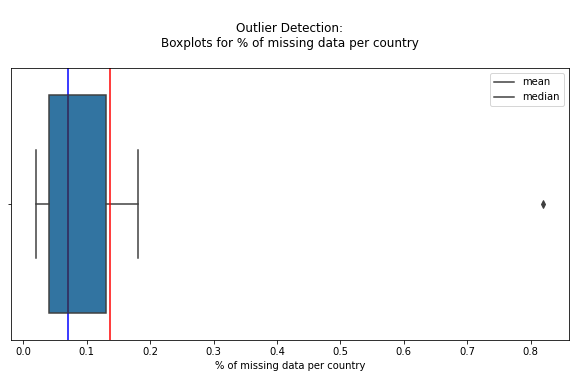

In [643]:
####### Outlier detection #######
#Creation of the box plot graph

# setting figure size
fig, ax = plt.subplots(figsize = (10, 5))


# developing a boxplot based on the % of Missing data  per coutnry 
sns.boxplot(x      = """% of missing data per country""",  # x-variable
            y      = None,     # optional y-variable
            hue    = None,     # optional categorical feature
            orient = 'h',      # horizontal or vertical
            data   = mv_count_country) # DataFrame where features exist


# Adding title and label
plt.title(label   = """
Outlier Detection:
Boxplots for % of missing data per country
""")
# adding vertical lines for mean and median
plt.axvline(x = mv_count_country['% of missing data per country'].mean(),
            color = 'red')


plt.axvline(x = mv_count_country['% of missing data per country'].median(),
            color = 'blue')

#Adding a legend
plt.legend(labels = ['mean' , 'median'])

# Displaying the plot
plt.show()


We choose to use the median as inpute for the missing values because the median is better than the mean and it is the best representative of the central location of the data. The greater the skewness of a distribution the greater the difference between the median and the mode.

In [644]:
# Filtering for countries with more than 80% missing 
outlier_country = mv_count_country.loc[mv_count_country.loc[:,'% of missing data per country'] > 0.8]
#Printing the outlier country
print(outlier_country)

  Country Name  Total Missing Observations  % of missing data per country
5      Curacao                          37                           0.82


We have decided to remove Curacao from our region due to it being a small country that is located on an island, it does not significantly represent the region as a whole. We feel Curacao does not best represent the region and therefore in order to keep our variability low we decided to remove this from our region analysis. 

In [645]:
#Removing the Curacao from the region data set
ironhide_region = ironhide.drop(5, axis = 0)
#Reseting the index after removal
ironhide_region = ironhide_region.reset_index(drop = True)
#Printing to check success
ironhide_region

,Country Code Total,Country Name,Hult Region,Cool Name,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),...,Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),Reported cases of malaria,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV"
0,ARG,Argentina,South America,Ironhide,1800.0,99.439102,63.7824,47.0,94.8,4.682912,...,NaN,0.4,4.1,105.063499,40.0,130.0,99.049461,23.822001,40.402673,1.6
1,BOL,Bolivia,South America,Ironhide,760.0,94.965500,80.0126,4.0,71.1,1.378966,...,85.8,0.3,28.1,NaN,16.9,9748.0,94.141022,39.098000,82.867021,12.0
2,BRA,Brazil,South America,Ironhide,14000.0,98.538307,68.9110,33.0,98.8,2.008670,...,NaN,0.5,2.6,NaN,9.0,315746.0,97.549026,31.094999,27.257569,3.2
3,CHL,Chile,South America,Ironhide,NaN,95.106262,53.7178,67.0,99.8,4.312294,...,NaN,0.3,4.1,NaN,15.0,NaN,94.908340,27.270000,80.789773,2.9
4,COL,Colombia,South America,Ironhide,7700.0,96.287514,62.4794,9.0,98.1,1.516403,...,NaN,0.5,9.5,119.184921,8.4,80559.0,92.667099,51.098999,38.052061,2.7
5,ECU,Ecuador,South America,Ironhide,1500.0,NaN,81.8738,14.0,85.8,2.344230,...,NaN,0.3,14.6,NaN,25.0,4891.0,NaN,45.769001,68.056947,5.9
6,GUY,Guyana,South America,Ironhide,100.0,97.322609,92.0830,41.0,96.0,2.088230,...,NaN,1.6,11.3,95.532410,30.0,11815.0,93.390831,34.275002,138.591844,15.0
7,PER,Peru,South America,Ironhide,3900.0,98.780090,54.1862,15.0,79.4,1.432003,...,NaN,0.4,14.2,104.882133,29.2,44522.0,95.921082,56.652000,58.433767,5.3
8,PRY,Paraguay,South America,Ironhide,NaN,90.540321,66.3098,11.0,87.2,0.736175,...,96.3,0.4,12.8,94.272919,12.5,348.0,89.849411,49.508999,103.545626,4.3
9,SUR,Suriname,South America,Ironhide,200.0,89.246910,51.6920,23.0,NaN,3.772722,...,NaN,1.2,9.1,82.057793,25.5,2709.0,89.245293,16.599001,109.166839,3.0


In [647]:
#Renaming the index for country 
ironhide_num = ironhide_region.rename(index = ironhide_region['Country Name'])
#Dropping text value columns
colums_for_drop = ['Country Name', 'Country Code Total', 'Hult Region', 'Cool Name']
ironhide_num = ironhide_num.drop(colums_for_drop,1)
# Checking the progress
ironhide_num

,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)",...,Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),Reported cases of malaria,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV"
Argentina,1800.0,99.439102,63.7824,47.0,94.8,4.682912,1.204000,0.390,0.716000,43.425999,...,NaN,0.4,4.1,105.063499,40.0,130.0,99.049461,23.822001,40.402673,1.6
Bolivia,760.0,94.965500,80.0126,4.0,71.1,1.378966,9.210000,9.340,9.284000,60.132999,...,85.8,0.3,28.1,NaN,16.9,9748.0,94.141022,39.098000,82.867021,12.0
Brazil,14000.0,98.538307,68.9110,33.0,98.8,2.008670,7.234000,3.765,5.208000,50.099998,...,NaN,0.5,2.6,NaN,9.0,315746.0,97.549026,31.094999,27.257569,3.2
Chile,NaN,95.106262,53.7178,67.0,99.8,4.312294,2.659000,1.053,1.646000,39.008999,...,NaN,0.3,4.1,NaN,15.0,NaN,94.908340,27.270000,80.789773,2.9
Colombia,7700.0,96.287514,62.4794,9.0,98.1,1.516403,6.330000,2.736,4.144000,45.789001,...,NaN,0.5,9.5,119.184921,8.4,80559.0,92.667099,51.098999,38.052061,2.7
Ecuador,1500.0,NaN,81.8738,14.0,85.8,2.344230,18.540001,6.385,11.085000,48.691002,...,NaN,0.3,14.6,NaN,25.0,4891.0,NaN,45.769001,68.056947,5.9
Guyana,100.0,97.322609,92.0830,41.0,96.0,2.088230,4.872000,3.542,3.956000,30.655001,...,NaN,1.6,11.3,95.532410,30.0,11815.0,93.390831,34.275002,138.591844,15.0
Peru,3900.0,98.780090,54.1862,15.0,79.4,1.432003,25.291000,8.997,16.365999,66.921997,...,NaN,0.4,14.2,104.882133,29.2,44522.0,95.921082,56.652000,58.433767,5.3
Paraguay,NaN,90.540321,66.3098,11.0,87.2,0.736175,10.994000,10.404,10.628000,51.896999,...,96.3,0.4,12.8,94.272919,12.5,348.0,89.849411,49.508999,103.545626,4.3
Suriname,200.0,89.246910,51.6920,23.0,NaN,3.772722,4.370000,2.899,3.425000,34.172001,...,NaN,1.2,9.1,82.057793,25.5,2709.0,89.245293,16.599001,109.166839,3.0


In [649]:
# Calculating the amount of missing values
mv_per_column = ironhide_num.isnull().sum()


The amount of missing values in the region: 


AIDS estimated deaths (UNAIDS estimates)                                      3
Adjusted net enrollment rate, primary (% of primary school age children)      1
Adolescent fertility rate (births per 1,000 women ages 15-19)                 0
Antiretroviral therapy coverage (% of people living with HIV)                 1
Births attended by skilled health staff (% of total)                          2
CO2 emissions (metric tons per capita)                                        0
Contributing family workers, female (% of female employment)                  0
Contributing family workers, male (% of male employment)                      0
Contributing family workers, total (% of total employment)                    0
Employment to population ratio, 15+, female (%) (modeled ILO estimate)        0
Employment to population ratio, 15+, male (%) (modeled ILO estimate)          0
Employment to population ratio, 15+, total (%) (modeled ILO estimate)    

In [653]:
#Creating the list of countries for imputations and correlation
list_for_imputation = []
list_for_corr = []

# Checking if the data has < 25% of missing value --> mean imputation strategy
# if more than 25% what should we doo?? linera regression or what? 
for column_name, n_missing_values in mv_per_column.iteritems():
    if n_missing_values == 0:
        continue
    elif n_missing_values <=3:
        list_for_imputation.append(column_name)
    else :
        list_for_corr.append(column_name)
        
#Printing the results

print(f"""Overall dataframe consist of {len(mv_per_column)} features after dropping of columns with strings,
out of this amount, {len(list_for_imputation)} features will be imputed using the mean value based on the imputational strategy, 
while for {len(list_for_corr)} a correlation strategy should be used.""")

# Imputing the mean for features with mv <= 25% 
for column_name in list_for_imputation:
    mean = ironhide_num[column_name].mean()
    ironhide_num[column_name] = ironhide_num[column_name].fillna(mean)

#Checking the missing values after the imputation 
mv_per_column_1 = ironhide_num.isnull().sum()

#Printing the missing values 
print(f'\n\n\nThe amount of missing values in the after the mean imputation: \n\n\n{mv_per_column_1}')

Overall dataframe consist of 41 features after dropping of columns with strings,
out of this amount, 9 features will be imputed using the mean value based on the imputational strategy, 
while for 5 a correlation strategy should be used.



The amount of missing values in the after the mean imputation: 


AIDS estimated deaths (UNAIDS estimates)                                      0
Adjusted net enrollment rate, primary (% of primary school age children)      0
Adolescent fertility rate (births per 1,000 women ages 15-19)                 0
Antiretroviral therapy coverage (% of people living with HIV)                 0
Births attended by skilled health staff (% of total)                          0
CO2 emissions (metric tons per capita)                                        0
Contributing family workers, female (% of female employment)                  0
Contributing family workers, male (% of male employment)                      0
Contributing family workers, total (% of total employm

In order to understand the strategy for the features with high percentage of missing values a correlation matrix of all features were created. 

In [655]:
#Creating a correlation matrix
corr_df = ironhide_num.corr()

#Creating a new dataframe to detect missing values highest correlation partner. 
best_corr = pd.DataFrame()
for column_name in list_for_corr:
    #filtering for highest correlation
    max_corr = corr_df[column_name][corr_df[column_name] <1]
    max_corr = max_corr.max()
    #Finding the highest correlation partner
    bc = corr_df[column_name][corr_df[column_name] == max_corr]
    #Appending the values to a dataframe
    best_corr = best_corr.append(bc) 

#Printing the highest correlation partners
best_corr

,"Literacy rate, adult total (% of people ages 15 and above)",Income share held by lowest 20%,"Tuberculosis death rate (per 100,000 people), including HIV",Improved sanitation facilities (% of population with access),Reported cases of malaria
Income share held by lowest 20%,0.853314,NaN,NaN,NaN,NaN
"Literacy rate, adult total (% of people ages 15 and above)",NaN,0.853314,NaN,NaN,NaN
Poverty gap at national poverty lines (%),NaN,NaN,0.996911,NaN,NaN
Pregnant women receiving prenatal care (%),NaN,NaN,NaN,1.0,NaN
"Primary completion rate, total (% of relevant age group)",NaN,NaN,NaN,NaN,0.763377


By looking at each feature with its highest correlation partner, ideally a linear regression should be used to predict the missing values. However for our case due to the limitations, judgement were based on the comparison of data point available for both features as well range between minimum and maximum values

In [361]:
lr = ironhide_num['Literacy rate, adult total (% of people ages 15 and above)']
lr

Argentina              NaN
Bolivia          90.698112
Brazil           90.036621
Chile            98.649010
Colombia         93.378181
Ecuador                NaN
Guyana                 NaN
Peru                   NaN
Paraguay         93.292084
Suriname         94.620941
Uruguay          98.163559
Venezuela, RB          NaN
Name: Literacy rate, adult total (% of people ages 15 and above), dtype: float64

In [362]:
r1_1 = lr.max() - lr.min()
r1_1

8.612388610839801

In [363]:
ishare = ironhide_num['Income share held by lowest 20%']
ishare

Argentina        4.0
Bolivia          3.2
Brazil           3.2
Chile            NaN
Colombia         3.0
Ecuador          3.8
Guyana           NaN
Peru             3.8
Paraguay         4.1
Suriname         NaN
Uruguay          5.0
Venezuela, RB    NaN
Name: Income share held by lowest 20%, dtype: float64

In [364]:
r1_2 = ishare.max()-ishare.min()
r1_2

2.0

In [365]:
isanit = ironhide_num['Improved sanitation facilities (% of population with access)'] 
isanit

Argentina        94.2
Bolivia          44.9
Brazil           79.4
Chile            96.6
Colombia         78.4
Ecuador          78.5
Guyana           82.4
Peru             70.3
Paraguay         80.0
Suriname         79.9
Uruguay          95.1
Venezuela, RB    92.1
Name: Improved sanitation facilities (% of population with access), dtype: float64

In [366]:
r2_1 = isanit.max()-isanit.min()
r2_1

51.699999999999996

In [367]:
preg = ironhide_num['Pregnant women receiving prenatal care (%)']

In [368]:
r2_2 = preg.max()-preg.min()
r2_2

10.5

In [369]:
pv_gap = ironhide_num['Poverty gap at national poverty lines (%)']
pv_gap

Argentina         NaN
Bolivia          27.8
Brazil            NaN
Chile             NaN
Colombia          NaN
Ecuador          14.5
Guyana            NaN
Peru             12.0
Paraguay          NaN
Suriname          NaN
Uruguay           5.3
Venezuela, RB     NaN
Name: Poverty gap at national poverty lines (%), dtype: float64

In [370]:
r3_1 = pv_gap.max()-pv_gap.min()
r3_1

22.5

In [371]:
tuber = ironhide_num['Tuberculosis death rate (per 100,000 people), including HIV']
tuber.describe()

count    12.000000
mean      4.975000
std       4.249091
min       1.400000
25%       2.625000
50%       3.100000
75%       5.450000
max      15.000000
Name: Tuberculosis death rate (per 100,000 people), including HIV, dtype: float64

In [372]:
r3_2 = tuber.max()-tuber.min()
r3_2

13.6

Therefore based on the comparisons it was decided, that imputing the mean value would not distract the data set results, therefore the mean value was imputed for the rest missing values. 

In [661]:
# Imputing the mean for other features
for column_name in list_for_corr:
    mean = ironhide_num[column_name].mean()
    ironhide_num[column_name] = ironhide_num[column_name].fillna(mean)

#Checking if imputation was succesful and there is no more missing values left
mv_per_column_2 = ironhide_num.isnull().any()

#Printing the missing values status
print(f'\n\n\nThe amount of missing values  after the second imputation: \n\n\n{mv_per_column_2}')




The amount of missing values  after the second imputation: 


AIDS estimated deaths (UNAIDS estimates)                                     False
Adjusted net enrollment rate, primary (% of primary school age children)     False
Adolescent fertility rate (births per 1,000 women ages 15-19)                False
Antiretroviral therapy coverage (% of people living with HIV)                False
Births attended by skilled health staff (% of total)                         False
CO2 emissions (metric tons per capita)                                       False
Contributing family workers, female (% of female employment)                 False
Contributing family workers, male (% of male employment)                     False
Contributing family workers, total (% of total employment)                   False
Employment to population ratio, 15+, female (%) (modeled ILO estimate)       False
Employment to population ratio, 15+, male (%) (modeled ILO estimate)         False
Employment to populati

Once the region data set was fulfilled, the best country representing the region should be found.

In [375]:
#Rounding the description matrix of the region dataset 
ironhide_num = ironhide_num.round(decimals=2)
ironhide_num.describe()



,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)",...,Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),Reported cases of malaria,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV"
count,12.00000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,3386.66750,95.482500,68.759167,25.818333,91.060000,2.758333,8.186667,4.409167,5.964167,47.193333,...,91.050000,0.581667,9.783333,100.107500,20.183333,50250.500000,94.043333,36.547500,72.017500,4.975000
std,3973.34757,3.563548,13.942934,18.349229,8.914258,1.668755,7.121763,3.499890,4.787680,10.078711,...,2.238608,0.401856,7.297675,8.926447,9.771371,87494.807972,3.512076,12.115031,32.769288,4.249091
min,100.00000,89.250000,51.690000,4.000000,71.100000,0.740000,1.200000,0.390000,0.720000,30.660000,...,85.800000,0.300000,2.600000,82.060000,8.400000,130.000000,88.820000,16.600000,27.260000,1.400000
25%,700.00000,93.930000,58.990000,13.250000,86.850000,1.497500,4.037500,2.100000,2.905000,42.325000,...,91.050000,0.375000,4.075000,95.215000,12.400000,4345.500000,91.965000,28.830000,48.972500,2.625000
50%,2593.33500,95.885000,65.045000,21.500000,92.930000,2.215000,5.600000,3.220000,4.050000,47.760000,...,91.050000,0.450000,9.300000,100.110000,17.750000,21926.000000,94.090000,34.155000,66.635000,3.100000
75%,3515.00250,98.600000,80.475000,35.000000,98.275000,3.905000,9.655000,7.042500,9.617500,50.550000,...,91.050000,0.520000,13.150000,104.925000,26.425000,50250.500000,96.327500,46.705000,88.040000,5.450000
max,14000.00000,99.440000,92.080000,67.000000,99.800000,6.360000,25.290000,10.400000,16.370000,66.920000,...,96.300000,1.600000,28.100000,119.180000,40.000000,315746.000000,99.050000,56.650000,138.590000,15.000000


In [1000]:
#Creating mean for full dataset 
mean_region_ironhide = ironhide_num.describe().iloc[1:2]
mean_region_ironhide = mean_region_ironhide.rename(index=lambda x: x.replace("mean", "South America"))
mean_region_ironhide

,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)",...,Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),Reported cases of malaria,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV"
South America,3386.666667,95.48094,68.7602,25.818182,91.06,2.758669,8.187084,4.408667,5.9625,47.19225,...,91.05,0.581818,9.783333,100.108277,20.183333,50250.5,94.043019,36.547,72.016769,4.975


In [662]:
#slicing for the mean column in the descriptive statistics of the rigion dataset
iron_mean = ironhide_num.describe().iloc[1:2]
#Rounding for 2 decimal places
iron_mean = iron_mean.iloc[0].round(2)
#Passing the values to the list this varible might be used for the world comparison
iron_mean_list = iron_mean.tolist()

,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)",...,Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),Reported cases of malaria,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV"
mean,3386.666667,95.48094,68.7602,25.818182,91.06,2.758669,8.187084,4.408667,5.9625,47.19225,...,91.05,0.581818,9.783333,100.108277,20.183333,50250.5,94.043019,36.547,72.016769,4.975


In [987]:
#Creating a copy of the region dataframe 
mn_ironhide = ironhide_num.copy()
#Printing dataframe for comparison 
mn_ironhide

,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)",...,Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),Reported cases of malaria,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV"
Bolivia,760.0,94.9655,80.0126,4.0,71.1,1.378966,9.21,9.34,9.284,60.132999,...,85.8,0.3,28.1,100.108277,16.9,9748.0,94.141022,39.098,82.867021,12.0


In [664]:
#Substracting of mean from each values in the dataset 
mn_ironhide_diff = mn_ironhide.sub(mn_ironhide.mean(axis=0).round(2), axis=1)
#Taking the absolute as some values in the dataframe might become negative 
mn_ironhide_diff = mn_ironhide_diff.abs()
#Printing new dataframe to check the values
mn_ironhide_diff

,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)",...,Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),Reported cases of malaria,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV"
Argentina,1586.670000,3.959102,4.9776,21.180000,3.74,1.922912,6.986000,4.020,5.244000,3.764001,...,0.00,0.180000,5.68,4.953499,19.82,50120.5,5.009461,12.727999,31.617327,3.37
Bolivia,2626.670000,0.514500,11.2526,21.820000,19.96,1.381034,1.020000,4.930,3.324000,12.942999,...,5.25,0.280000,18.32,0.001723,3.28,40502.5,0.101022,2.548000,10.847021,7.03
Brazil,10613.330000,3.058307,0.1510,7.180000,7.74,0.751330,0.956000,0.645,0.752000,2.909998,...,0.00,0.080000,7.18,0.001723,11.18,265495.5,3.509026,5.455001,44.762431,1.77
Chile,0.003333,0.373738,15.0422,41.180000,8.74,1.552294,5.531000,3.357,4.314000,8.181001,...,0.00,0.280000,5.68,0.001723,5.18,0.0,0.868340,9.280000,8.769773,2.07
Colombia,4313.330000,0.807514,6.2806,16.820000,7.04,1.243597,1.860000,1.674,1.816000,1.400999,...,0.00,0.080000,0.28,19.074921,11.78,30308.5,1.372901,14.548999,33.967939,2.27
Ecuador,1886.670000,0.000940,13.1138,11.820000,5.26,0.415770,10.350001,1.975,5.125000,1.501002,...,0.00,0.280000,4.82,0.001723,4.82,45359.5,0.003019,9.219001,3.963053,0.93
Guyana,3286.670000,1.842609,23.3230,15.180000,4.94,0.671770,3.318000,0.868,2.004000,16.534999,...,0.00,1.020000,1.52,4.577590,9.82,38435.5,0.649169,2.274998,66.571844,10.03
Peru,513.330000,3.300090,14.5738,10.820000,11.66,1.327997,17.101000,4.587,10.405999,19.731997,...,0.00,0.180000,4.42,4.772133,9.02,5728.5,1.881082,20.102000,13.586233,0.33
Paraguay,0.003333,4.939679,2.4502,14.820000,3.86,2.023825,2.804000,5.994,4.668000,4.706999,...,5.25,0.180000,3.02,5.837081,7.68,49902.5,4.190589,12.958999,31.525626,0.67
Suriname,3186.670000,6.233090,17.0680,2.820000,0.00,1.012722,3.820000,1.511,2.535000,13.017999,...,0.00,0.620000,0.68,18.052207,5.32,47541.5,4.794707,19.950999,37.146839,1.97


In [665]:
#Creating a list for 3 closest countries to mean per each feature
countries_index = []
#Creating a loop for every column to get 3 top choices
for column in mn_ironhide_diff:
    #Sorting the values by the lowest number as it is the lowest distance to mean 
    # index is used, to get the name of the countries for values 
    top_3 = check[column].sort_values(ascending = True)[0:3].index
    #Index list for the countries count 
    countries_index.append(top_3)

#Checking number of features in the dataframe and the countries_index list
print(f"There are {len(countries_index)} objects in count_countries list, while {len(mn_ironhide_diff.columns)} features in the data frame.")

There are 41 objects in count_countries list, while 41 features in the data frame.


In [678]:
#Creating the list for countries count
total_countries = []
#Looping for each countr_index list to acces the countries strings
for country in countries_index:
    #Top 3 choices 
    c1=country[0]
    c2=country[1]
    c3=country[2]
    #appending the choices to the list 
    total_countries.append(c1)
    total_countries.append(c2)
    total_countries.append(c3)
    
# Creating a dictionary with count of each country appearance
Score_card = dict((x,total_countries.count(x)) for x in set(total_countries))

#Sorting the dictionary by values 
Score_card = sorted(Score_card.items(), key=lambda x: x[1], reverse=True)
print(Score_card)
print(f'''\n\nThe country which best represent the {name_of_the_region} based on the data comparison and score card creation is  {Score_card[0][0]},
with score: {Score_card[0][1]}!''')

[('Colombia', 16), ('Brazil', 14), ('Venezuela, RB', 14), ('Guyana', 13), ('Ecuador', 10), ('Suriname', 10), ('Uruguay', 9), ('Chile', 9), ('Paraguay', 8), ('Argentina', 8), ('Bolivia', 7), ('Peru', 5)]


The country which best represent the South America based on the data comparison and score card creation is  Colombia,
with score: 16!


As can be seen from the output of the code above, the country that represents South America the best is Colombia, It yielded a score of 16, however Brazil, Venezuela and Guyana were not far behind with 14, 13 and 13. It is not a surprise that Colombia ranked first, research shows that Colombia have 24 of the top 58 clinics in Latin America  and the WHO have ranked Colombia as having the 22nd best clinics and facilities in the world (medellinGuru, 2019). Furthermore Colombia is also classed as an upper-middle economy which is one of South Americas largest. Furthermore with rich natural resources at their disposal such as coffee, coal, gold and petroleum, Colombia is one of the largest exporting Countries in South America leading to low levels of unemployment too. (USNews, 2019)

COMPARISON OF OUR REGION WITH THE WORLD 

In [684]:
world.head(5)

,Country Code Total,Country Name,Hult Region,Cool Name,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),...,Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),Reported cases of malaria,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV"
0,ABW,Aruba,Carribean Islands & Parts of Latin America,Ratchet,NaN,99.103333,32.7920,NaN,NaN,26.230847,...,NaN,NaN,NaN,95.133034,NaN,NaN,99.058319,NaN,141.187288,0.89
1,AFG,Afghanistan,Middle East & Russia,Mirage,NaN,NaN,111.1414,NaN,24.0,0.154101,...,36.0,NaN,24.6,NaN,27.7,81574.0,NaN,72.320000,73.065520,40.00
2,AGO,Angola,Sub-Saharan Africa,Sideswipe,9200.0,74.893661,178.1842,6.0,NaN,1.181527,...,NaN,1.6,23.7,39.270191,37.3,1377992.0,74.893661,71.968002,127.544974,69.00
3,ALB,Albania,Eastern Europe,Skids & Mudflap,100.0,87.151161,18.9116,14.0,NaN,1.484311,...,NaN,0.1,9.7,92.830223,7.1,NaN,87.151161,59.299999,77.451711,0.70
4,AND,Andorra,Eastern Europe,Skids & Mudflap,NaN,NaN,NaN,NaN,NaN,6.427887,...,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN


In [742]:
#As know from before
print(f'{r_count} regions are there in the World')


14 regions are there in the World!!!


In order to undersand by what features the region can stand out in the world, means for each region should be calculated.


In [975]:
#Creating unique region list 
unique_region_list = world['Hult Region'].unique()
#Printing the region data list
print(f'World has {len(unique_region_list)} regions, these are \n\n{unique_region_list} \n\n region!')
#Dropping the teams region 
unique_region_list = unique_region_list[unique_region_list != 'South America']
#Cheching the new length 
print(f'\n\n{len(unique_region_list)} regions after drop!')

# Dropping mean world
unique_region_list = unique_region_list[unique_region_list != 'World']
#Changing np.array list to list 
unique_region_list = unique_region_list.tolist()

#Creating a world data frame copy
world_1 = world.copy()

World has 14 regions, these are 

['Carribean Islands & Parts of Latin America ' 'Middle East & Russia'
 'Sub-Saharan Africa' 'Eastern Europe' 'Arabian Peninsula' 'South America'
 'Australia & Oceania' 'Western Europe' 'East/South Africa' 'Central Asia'
 'North America & Part of Latin America' 'East/Southeast Asia'
 'Northern Sub-Saharan Africa' 'World'] 

 region!


13 regions after drop!


In [972]:
#Cheking the dataframe
world_1

,Country Code Total,Country Name,Hult Region,Cool Name,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),...,Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),Reported cases of malaria,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV"
0,ABW,Aruba,Carribean Islands & Parts of Latin America,Ratchet,NaN,99.103333,32.7920,NaN,NaN,26.230847,...,NaN,NaN,NaN,95.133034,NaN,NaN,99.058319,NaN,141.187288,0.89
9,ATG,Antigua and Barbuda,Carribean Islands & Parts of Latin America,Ratchet,NaN,84.916763,54.2470,NaN,100.0,5.194500,...,100.0,NaN,26.1,95.276970,10.5,NaN,84.096741,NaN,115.283599,NaN
20,BHS,"Bahamas, The",Carribean Islands & Parts of Latin America,Ratchet,NaN,98.607712,38.0850,29.0,99.0,4.290906,...,NaN,2.5,11.9,101.156769,12.2,14.0,98.242279,17.141001,87.429223,1.20
27,BRB,Barbados,Carribean Islands & Parts of Latin America,Ratchet,100.0,96.814499,47.6772,40.0,100.0,5.844583,...,NaN,1.1,5.1,94.600258,10.0,NaN,96.801208,17.066999,98.188744,0.37
44,CUB,Cuba,Carribean Islands & Parts of Latin America,Ratchet,500.0,97.613869,48.1398,30.0,99.9,2.691786,...,NaN,0.2,2.5,88.062134,43.2,NaN,96.877136,26.062000,44.917221,0.42
46,CYM,Cayman Islands,Carribean Islands & Parts of Latin America,Ratchet,NaN,NaN,NaN,NaN,NaN,11.016381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,DMA,Dominica,Carribean Islands & Parts of Latin America,Ratchet,NaN,89.674370,NaN,NaN,100.0,1.857388,...,100.0,NaN,4.9,89.349113,18.8,NaN,89.674370,NaN,96.915174,1.50
53,DOM,Dominican Republic,Carribean Islands & Parts of Latin America,Ratchet,5600.0,85.166496,107.0856,11.0,NaN,2.149242,...,NaN,1.5,20.2,NaN,19.7,1840.0,82.638573,47.667000,61.392053,2.90
76,GRD,Grenada,Carribean Islands & Parts of Latin America,Ratchet,NaN,95.783653,40.9980,NaN,NaN,2.434552,...,NaN,NaN,26.1,110.486542,13.3,NaN,90.841827,NaN,79.848869,NaN
84,HTI,Haiti,Carribean Islands & Parts of Latin America,Ratchet,6000.0,NaN,45.4042,16.0,NaN,0.247111,...,NaN,2.0,52.5,NaN,4.1,36774.0,NaN,88.014999,56.304322,9.00


In [1031]:
#Creating a new datafram to imput mean values per region
world_df_new = pd.DataFrame()
# Looping for every region in the region list
for region in unique_region_list:
    
    #Subsetting the dataframe per region
    region_dataframe = world_1[world_1['Hult Region'] == region]
    
    #Using describe function to obtain mean row for region 
    region_describe  = region_dataframe.describe().iloc[1:2]
    
    #Replacing the row name with the region name
    region_describe = region_describe.rename(index=lambda x: x.replace("mean",region ))
    #Appending new dataframe with regions iside the loop
    world_df_new = world_df_new.append(region_describe)

#Adding group region to the dataframe
world_df_new = world_df_new.append(mean_region_ironhide)

#Checking the dataframe
world_df_new

,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)",...,Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),Reported cases of malaria,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV"
Carribean Islands & Parts of Latin America,2450.000000,94.318180,51.949400,23.428571,99.590000,7.086937,1.668545,0.699455,1.105000,48.970272,...,99.625000,1.500000,16.025000,97.428181,15.992308,9662.500000,92.725282,32.742727,146.806675,1.805833
Middle East & Russia,1915.454545,89.955350,38.091700,12.750000,88.116667,5.001561,22.238071,9.378000,12.903714,40.898429,...,46.000000,0.250000,8.285714,93.025734,15.784615,32390.333333,88.150875,38.675072,84.463772,13.423571
Sub-Saharan Africa,19050.000000,74.056810,114.102157,10.800000,64.185714,1.115350,15.795818,9.634091,12.293455,52.365000,...,78.233333,2.555000,17.773684,66.943701,13.177273,351206.125000,73.331025,67.833182,86.196402,35.652174
Eastern Europe,108.333333,96.234699,15.268853,36.166667,99.600625,6.948588,5.730000,2.059158,3.603737,43.486684,...,98.500000,0.141667,3.326316,96.537608,20.485714,NaN,93.995508,20.915526,113.630793,2.357895
Arabian Peninsula,100.000000,93.051406,30.561840,38.000000,97.537500,13.089313,10.029200,2.948200,4.341667,27.581333,...,95.600000,0.100000,8.827273,93.523800,10.454545,8888.600000,90.871282,21.616734,100.745120,1.862143
Australia & Oceania,733.333333,98.539589,35.800877,40.333333,92.371429,4.218576,15.946182,11.182000,13.507273,49.607636,...,96.216667,0.366667,5.155556,102.049200,10.450000,42917.333333,97.589249,43.618272,106.261436,13.431579
Western Europe,411.111111,98.868140,10.685657,57.400000,98.900000,9.133969,1.296357,0.625429,0.922571,50.756357,...,99.660000,0.260000,2.500000,99.979802,26.681132,NaN,97.178037,14.678071,111.766883,1.528000
East/South Africa,39242.857143,79.752779,95.743400,17.350000,75.000000,0.925119,25.331286,12.260238,18.512762,57.841952,...,90.250000,9.028571,29.594118,63.515956,21.340000,231881.705882,79.298597,64.395096,79.673910,44.860000
Central Asia,24531.000000,94.542868,38.977554,7.200000,87.275000,2.799608,31.181923,12.423231,19.541615,51.110538,...,86.375000,0.340000,17.291667,90.726951,14.258333,211390.100000,91.166878,56.687383,87.604572,22.046154
North America & Part of Latin America,1068.750000,95.760317,70.557120,23.875000,96.550000,5.341600,6.298500,5.509000,5.796000,45.723599,...,91.950000,0.587500,10.327273,90.178909,20.711111,2621.000000,94.474694,33.526200,91.763407,2.658182


Our region of South America is relatively strong in some contexts such as Co2 emissions, it has significantly less Co2 emissions when compared to Western Europe and the Arabian Peninsula. In other contexts such as estimated deaths from Aids, it is much higher than  Western Europe and Eastern Europe but it is significantly less than East/South Africa. When looking at the data for South America and comparing it to other regions, South America does not have any outstanding comparisons but it does not have anything that is so concerning in comparisons. I would say Continents such as south/east Africa have got data that they should be concerned about. 

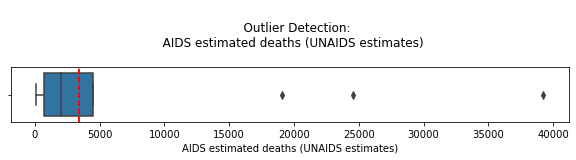

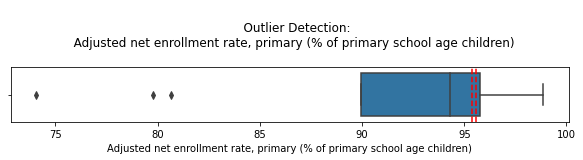

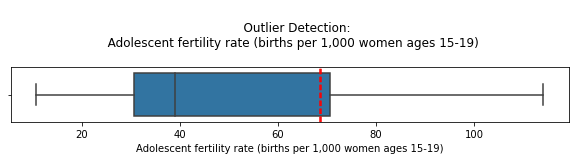

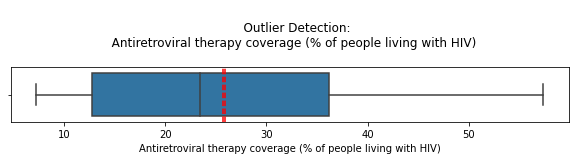

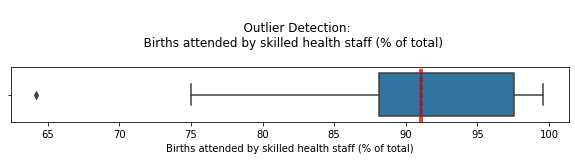

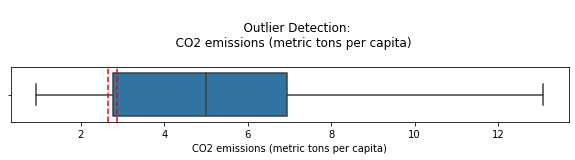

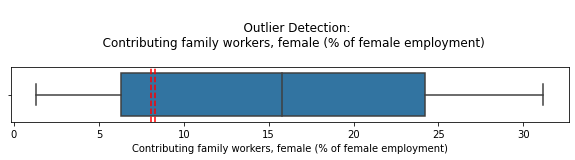

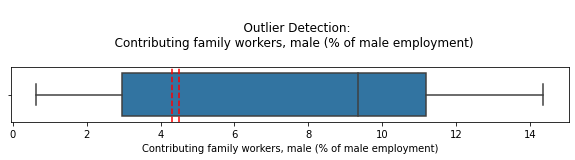

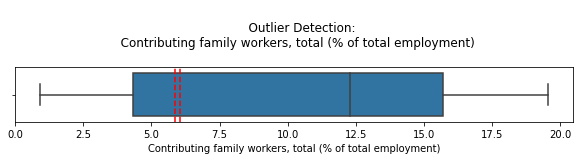

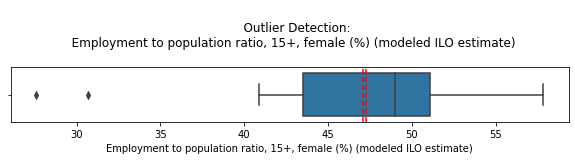

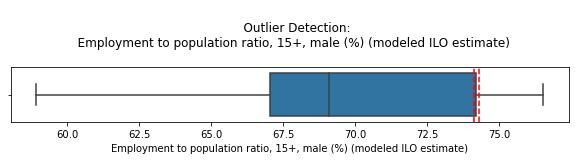

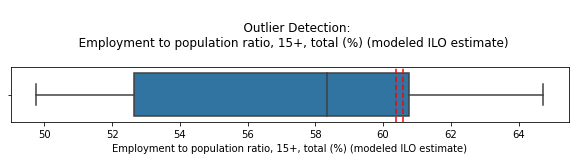

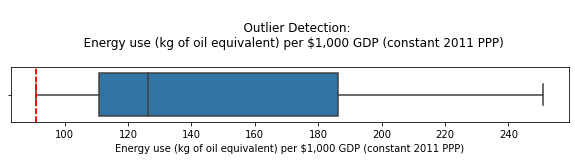

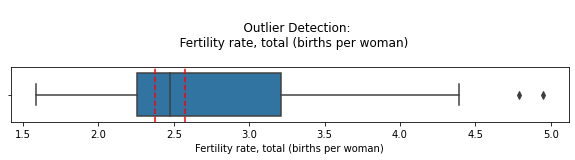

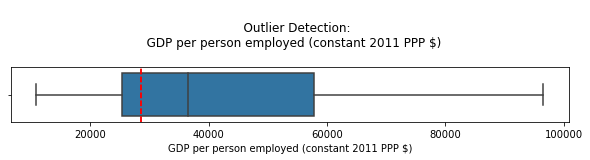

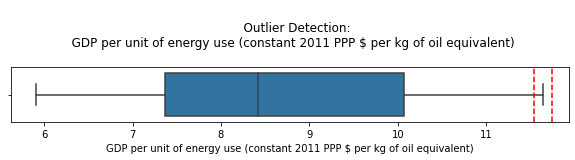

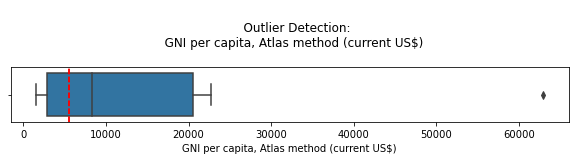

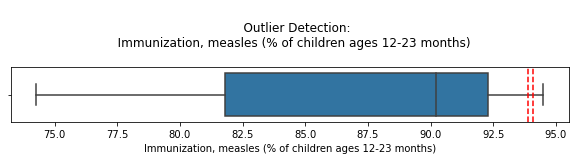

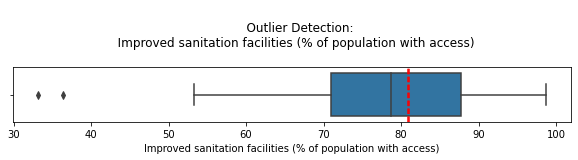

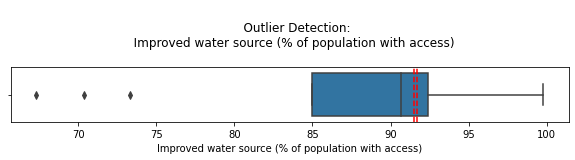

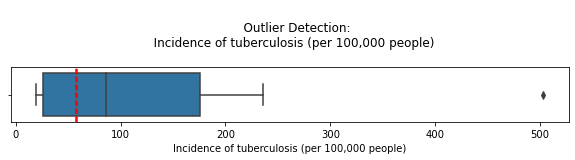

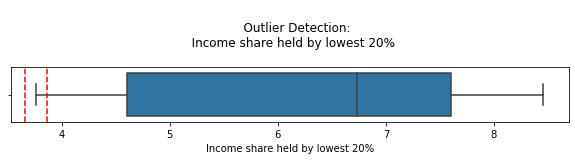

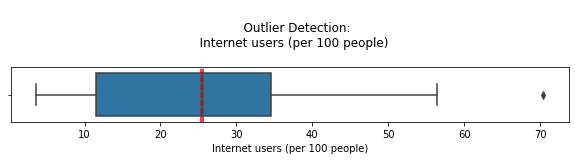

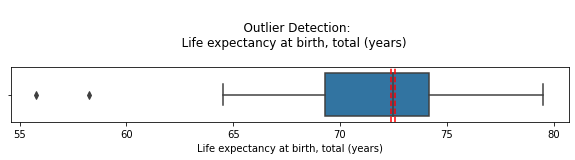

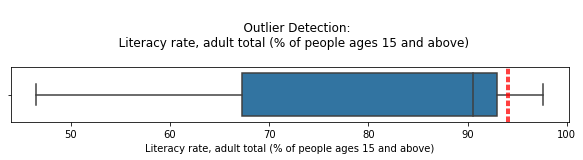

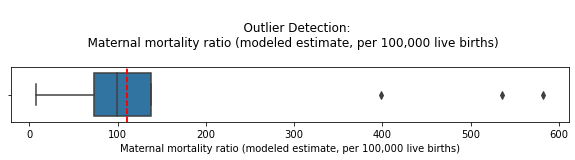

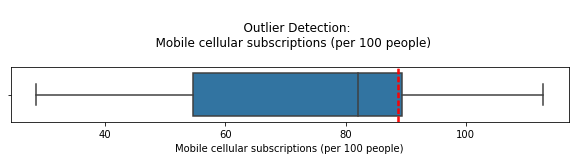

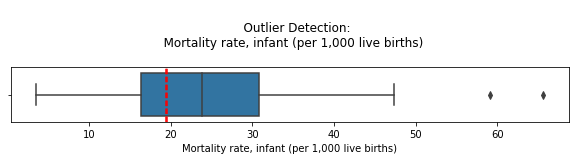

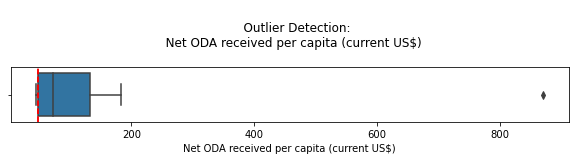

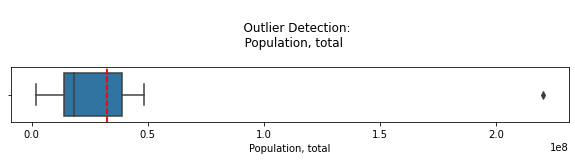

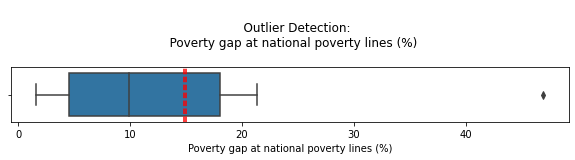

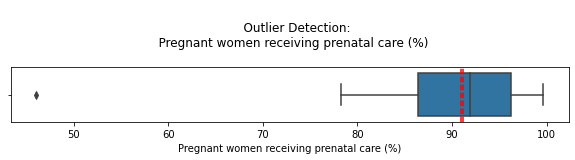

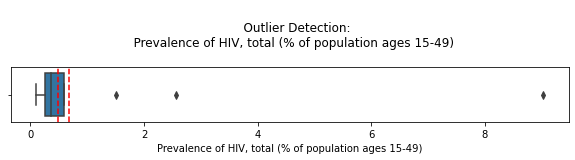

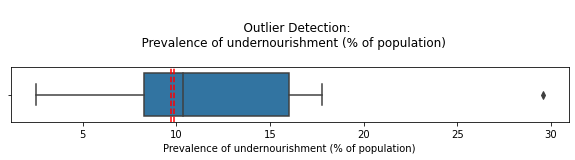

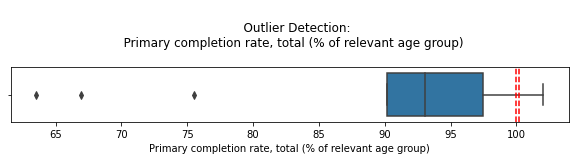

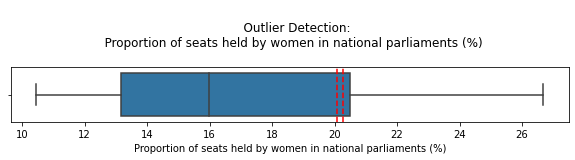

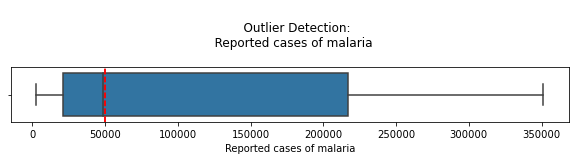

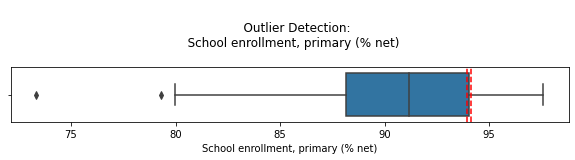

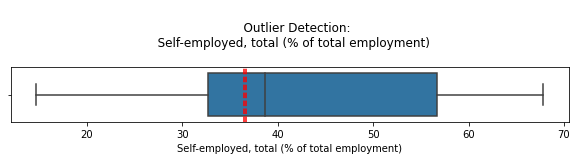

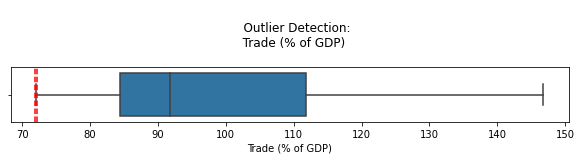

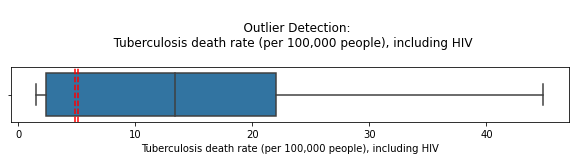

In [1030]:
#creating box  plots for each column in a dataframe 
for column in world_df_new:

    # setting figure size
    fig, ax = plt.subplots(figsize = (10, 1))


    # developing a boxplot for Literacy rate, adult total (% of people ages 15 and above) 
    sns.boxplot(x      = column,  # x-variable
                y      = None,     # optional y-variable
                hue    = None,     # optional categorical feature
                orient = 'h',      # horizontal or vertical
                data   = world_df_new) # DataFrame where features exist


    # Adding title and label
    plt.title(label   = f"""
    Outlier Detection:
   {column} 
    """)


    #Creating a range of value for the group region:
    
    x1 = world_df_new[column]['South America']*(0.1/world_df_new[column]['South America']) + world_df_new[column]['South America']
    x2 = world_df_new[column]['South America'] - (world_df_new[column]['South America']*(0.1/world_df_new[column]['South America']))
   
    # adding a line to signify SOuth America region
    plt.axvline(x = x1,
                color = "red",
                linestyle= '--')
    
    plt.axvline(x =  x2,
                color = "red",
                linestyle= '--')


    plt.xlabel(xlabel = f"""{column}""")

    # Displaying the plot
    plt.show()   

Amongst our top 5 featues we selected the employemnt to popualtion ratio 15+ men as one of them. As shown in the box plot above we can see that there is a minimum of 67% or the male population is employed in South America, this can be contributed by the demand of resources available to export such as gold and coffee.

Our second feature that we picked was the self-employment. As seen in the box plot above on average there is nearly 40% of South American citizens that are self-employed. The boxplot is fairly skewed to the right and it shows with South America being one the biggest exporting regions there is a need for businesses that speicalize in shipping or extracting.More businesses lead to more employment which leads to more disposable income and economic spending. 

Our third feature that we have chosen is the literacy rate. The boxplot above for literacy rate shows that it is skewed to the right and there is a minimum of 67% of the population that is literate, with the max vaue being roughly around 93%. The 93% is also backed up by the Statsita who say that 93% of Latin Americas population is literate, showing this variable is no outlier. 

Our fourth feature that we chose was the immunization of measels. Almost 83% of the population is immunized from measels in South America, this can be attributed to having improved healthcare, clinics, facilites and sanitation. Countries such as Colombia have got better healthcare facilities than a lot of the "more powerful" countries such as the US(MediilinGuru, 2019) 

Our fifth feature was the infant mortality rate. The box plot shows that per 1000 births there is an average of 25 deaths which is roughy 2.5%. There are very low percentages and once again it is owing to South American countries having exceptional healthcare availabale at their disposal 

REFRENCES
1. (2019). Retrieved 2 November 2020, from https://www.usnews.com/news/best-countries/colombia

2. Colombia has 24 of the Best Hospitals in Latin America. (2020). Retrieved 2 November 2020, from       https://medellinguru.com/hospitals/

3. Mean, Mode and Median - Measures of Central Tendency - When to use with Different Types of Variable and Skewed Distributions | Laerd Statistics. (2020). Retrieved 2 November 2020, from https://statistics.laerd.com/statistical-guides/measures-central-tendency-mean-mode-median.php#:~:text=In%20these%20situations%2C%20the%20median,as%20opposed%20to%20the%20mean.

4. Over 20 million children worldwide missed out on measles vaccine annually in past 8 years, creating a pathway to current global outbreaks - UNICEF. (2019). Retrieved 2 November 2020, from https://www.unicef.org/lac/en/press-releases/over-20-million-children-worldwide-missed-out-measles-vaccine-annually-past-8-years

5. Reimers, F. (2020). Education and Poverty in Latin America. Retrieved 2 November 2020, from https://revista.drclas.harvard.edu/book/education-and-poverty-latin-america

